# Task 2 (Beginner)
**Prediction using Unsupervised ML**

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Prepared By: Aniket Kumar

**Importing the Libraries** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

**Importing the Dataset**

In [2]:
t2= pd.read_csv(r"Downloads/Iris.csv")

**Describing the Data**

In [3]:
t2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
t2.shape

(150, 6)

In [5]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Data Visualization**

Univariate Analysis

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


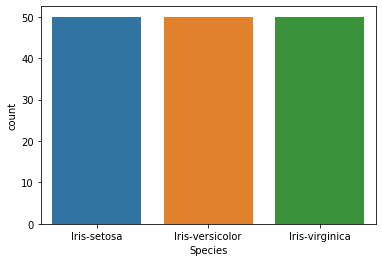

In [6]:
print(t2["Species"].value_counts()) 
sns.countplot(x="Species", data=t2)
plt.show()

Bivariate Analysis

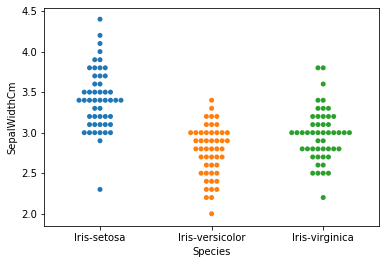

In [7]:
sns.swarmplot(x="Species", y="SepalWidthCm", data=t2)
plt.show()

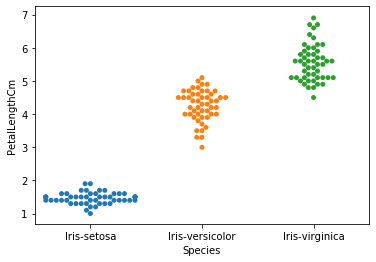

In [8]:
sns.swarmplot(x="Species", y="PetalLengthCm", data=t2)
plt.show()

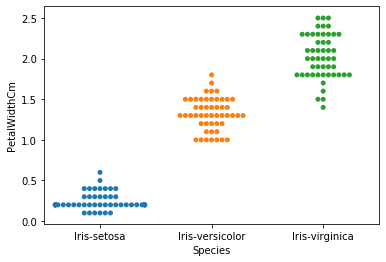

In [9]:
sns.swarmplot(x="Species", y="PetalWidthCm", data=t2)
plt.show()

Multivariate Analysis

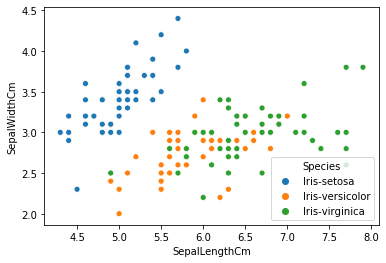

In [10]:
sns.scatterplot(x=t2["SepalLengthCm"], y=t2["SepalWidthCm"], hue=t2["Species"])
plt.show()

**Clustering using K-means**

In [11]:
data = t2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

In [12]:
from sklearn.cluster import KMeans
x = t2.iloc[:, [0, 1, 2, 3]].values
dis=[]
k=range(1,10)
for i in k:
    algo=KMeans(n_clusters=i, n_init=100)
    algo.fit(x)
    dis.append(algo.inertia_)

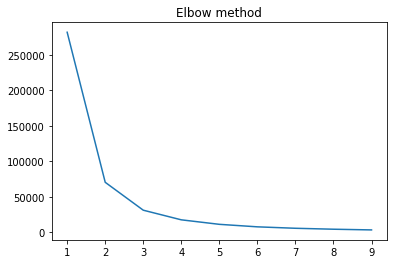

In [13]:
plt.plot(k,dis)
plt.title("Elbow method")
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

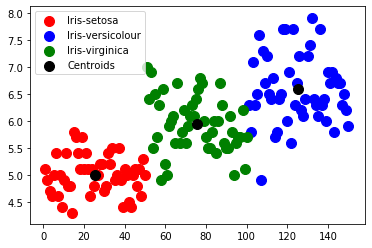

In [15]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()